In [19]:
#importing necessary libraries for the analysis
#

import requests
import numpy as np
import json
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
# in this block make sure that you change the APIkey to your custom key from the LOL API main site

apikey='RGAPI-4409004b-c561-47dc-a5cd-c396a7728a4d'
myresp= requests.get('https://na1.api.riotgames.com/lol/summoner/v4/summoners/by-name/reydeloscriollos?api_key={}'.format(apikey))


In [21]:
#run this code after running the first scrip to get the puuid to then put in the next line of code, if you get a 403 error, 
# you have the wrong key or it is out of dat(it needs to be refreshed on the site every 24 hours)

myresp.json()

{'id': '8_ogx0Ro8pJixXDSZLKaqgtH0XSRuC5jndwdchQ9odzcTqQ',
 'accountId': '_5IqpvWSbxIpp5xb68Ea3Ip5NlutvRklZBI5xUbV0vO3pA',
 'puuid': 'kaRj0TF9dJQpxiAXS9DukCLbfuiT9aAVSDbSkm329KWSkqzi87iE6HlEBuUdRMjcpt-XcFy0yQs3kw',
 'name': 'reydeloscriollos',
 'profileIconId': 4804,
 'revisionDate': 1622004320640,
 'summonerLevel': 200}

In [22]:
# run this code next after you obtain the match code from the block above

apimatch='kaRj0TF9dJQpxiAXS9DukCLbfuiT9aAVSDbSkm329KWSkqzi87iE6HlEBuUdRMjcpt-XcFy0yQs3kw'
sndresp=requests.get('https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/{}/ids?start=0&count=100&api_key={}'.format(apimatch,apikey))

listnew=[]
itera=500
while itera>0:
    response=requests.get('https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/{}/ids?start={}&count=100&api_key={}'.format(apimatch,itera,apikey))
    
    listnew.extend(response.json())
    itera-= 100

In [23]:
#check that you are getting a 200 success response
sndresp

<Response [200]>

In [24]:
#this block is grabing the each match and matching all of match numbers to the match info api


# pre data definitions
test_match=listnew
dictionaryOfPlayers={}
counter=0

# note that the LOL API has a request limit that you can not make more that 20 request in 2 minutes
#so you have to use the time class to mute the code for 3 seconds
for item in test_match:
    
    time.sleep(3)
    my_match_in_for=requests.get('https://americas.api.riotgames.com/lol/match/v5/matches/{}?api_key={}'.format(item,apikey))
    vari=my_match_in_for.json()
    if 'status' not in vari:
        dictionaryOfPlayers[counter]= vari['info']['participants']
    else:
        continue
    counter+=1

In [25]:
my_match_in_for

<Response [200]>

In [26]:
# This row was not useful for any of the analysis that need to be done
for player in dictionaryOfPlayers[0]:
    print(player)
    del player['perks']

{'assists': 10, 'baronKills': 0, 'bountyLevel': 0, 'champExperience': 15423, 'champLevel': 16, 'championId': 37225015, 'championName': 'Fiora', 'championTransform': 0, 'consumablesPurchased': 2, 'damageDealtToObjectives': 21166, 'damageDealtToTurrets': 11777, 'damageSelfMitigated': 21033, 'deaths': 3, 'detectorWardsPlaced': 0, 'doubleKills': 0, 'dragonKills': 0, 'firstBloodAssist': False, 'firstBloodKill': False, 'firstTowerAssist': False, 'firstTowerKill': True, 'gameEndedInEarlySurrender': False, 'gameEndedInSurrender': False, 'goldEarned': 13318, 'goldSpent': 11758, 'individualPosition': 'TOP', 'inhibitorKills': 0, 'item0': 1028, 'item1': 3047, 'item2': 3074, 'item3': 3004, 'item4': 3078, 'item5': 0, 'item6': 3340, 'itemsPurchased': 22, 'killingSprees': 1, 'kills': 4, 'lane': 'TOP', 'largestCriticalStrike': 596, 'largestKillingSpree': 4, 'largestMultiKill': 1, 'longestTimeSpentLiving': 999, 'magicDamageDealt': 3736, 'magicDamageDealtToChampions': 1322, 'magicDamageTaken': 2545, 'neu

In [27]:
# you should get an error message, just check that it was deleted
del df_pd['perks']

NameError: name 'df_pd' is not defined

In [28]:
#appending the gathered data from the API call and appending them into one pandas Dataframe
list_of_frames=[]
for dataframe2 in  dictionaryOfPlayers:
    list_of_frames.append(pd.DataFrame(dictionaryOfPlayers[dataframe2]))
    
    
df_pd=pd.concat(list_of_frames,ignore_index=True)

In [30]:
df_pd.info
games=df_pd.loc[df_pd['summonerName']=='reydeloscriollos']
games

,assists,baronKills,bountyLevel,champExperience,champLevel,championId,championName,championTransform,consumablesPurchased,damageDealtToObjectives,...,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win,perks,damageDealtToBuildings,inhibitorsLost,nexusLost,turretsLost
7,1,0,0,14224,15,37683774,Yone,0,1,10473,...,13,0,0,8,False,NaN,NaN,NaN,NaN,NaN
19,24,0,1,20600,18,37814848,Senna,0,5,8702,...,33,2,1,17,True,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",NaN,NaN,NaN,NaN
27,21,0,4,28588,18,37683774,Senna,0,3,14169,...,35,0,8,16,True,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",NaN,NaN,NaN,NaN
32,3,0,0,12495,14,37356089,Senna,0,1,635,...,10,0,0,6,False,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",NaN,NaN,NaN,NaN
44,14,0,3,12943,14,37487163,Senna,0,3,6878,...,30,0,0,18,True,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4922,23,1,1,24585,18,235,Senna,0,4,23669,...,28,0,1,16,True,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",6588.0,1.0,0.0,7.0
4932,8,0,0,18141,17,90,Malzahar,0,6,7579,...,17,0,0,12,False,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",406.0,3.0,1.0,10.0
4941,10,0,0,10446,13,887,Gwen,0,1,3463,...,13,0,1,8,False,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",0.0,1.0,1.0,9.0
4957,3,0,0,12572,14,235,Senna,0,3,1488,...,10,0,0,6,False,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",0.0,1.0,1.0,9.0


In [101]:
#save the main data file so you can easily load at a later time

df_pd.to_json(r'C:\Users\amird\mydata.json')

In [ ]:
### ONLY Run this when you wantto recoup data and not run the long code
# with open(r'C:\Users\amird\mydata.json') as f:
#   data = json.load(f)
# df_pd=pd.DataFrame(data)

In [42]:
#changing the Items column so that we can match it to the Items API through Data dragon 

games["item0"]=games["item0"].astype(str)
games["item2"]=games["item2"].astype(str)
games["item3"]=games["item3"].astype(str)
games["item4"]=games["item4"].astype(str)
games["item5"]=games["item5"].astype(str)
games["item6"]=games["item6"].astype(str)
games["win"]=games['win'].map(lambda x: 'win' if x==True else 'loss')


<ipython-input-42-ec795d828206>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games["item0"]=games["item0"].astype(str)
<ipython-input-42-ec795d828206>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games["item2"]=games["item2"].astype(str)
<ipython-input-42-ec795d828206>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [34]:
item_versionlist=requests.get('https://ddragon.leagueoflegends.com/api/versions.json')
item_req=requests.get('http://ddragon.leagueoflegends.com/cdn/{}/data/en_US/item.json'.format(item_versionlist.json()[0]))



In [35]:
file=item_req.json()

In [36]:
dictionaryOfItems={}

for itemnum in file['data']:
    
    dictionaryOfItems[itemnum]=file['data'][itemnum]['name']


{'1001': 'Boots',
 '1004': 'Faerie Charm',
 '1006': 'Rejuvenation Bead',
 '1011': "Giant's Belt",
 '1018': 'Cloak of Agility',
 '1026': 'Blasting Wand',
 '1027': 'Sapphire Crystal',
 '1028': 'Ruby Crystal',
 '1029': 'Cloth Armor',
 '1031': 'Chain Vest',
 '1033': 'Null-Magic Mantle',
 '1035': 'Emberknife',
 '1036': 'Long Sword',
 '1037': 'Pickaxe',
 '1038': 'B. F. Sword',
 '1039': 'Hailblade',
 '1042': 'Dagger',
 '1043': 'Recurve Bow',
 '1052': 'Amplifying Tome',
 '1053': 'Vampiric Scepter',
 '1054': "Doran's Shield",
 '1055': "Doran's Blade",
 '1056': "Doran's Ring",
 '1057': 'Negatron Cloak',
 '1058': 'Needlessly Large Rod',
 '1082': 'Dark Seal',
 '1083': 'Cull',
 '2003': 'Health Potion',
 '2010': 'Total Biscuit of Everlasting Will',
 '2015': 'Kircheis Shard',
 '2031': 'Refillable Potion',
 '2033': 'Corrupting Potion',
 '2051': "Guardian's Horn",
 '2052': 'Poro-Snax',
 '2055': 'Control Ward',
 '2065': "Shurelya's Battlesong",
 '2138': 'Elixir of Iron',
 '2139': 'Elixir of Sorcery',
 '

In [43]:
#map the dictionary of items to the matching codes for the items

games["item0"]=games["item0"].map(dictionaryOfItems)
games["item1"]=games["item1"].map(dictionaryOfItems)
games["item2"]=games["item2"].map(dictionaryOfItems)
games["item3"]=games["item3"].map(dictionaryOfItems)
games["item4"]=games["item4"].map(dictionaryOfItems)
games["item5"]=games["item5"].map(dictionaryOfItems)
games["item6"]=games["item6"].map(dictionaryOfItems)


<ipython-input-43-9ac9404ee8bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games["item0"]=games["item0"].map(dictionaryOfItems)
<ipython-input-43-9ac9404ee8bb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games["item1"]=games["item1"].map(dictionaryOfItems)
<ipython-input-43-9ac9404ee8bb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [45]:
# Simple spread of the data and the win loss ratio for all of the champions I played
# and there win loss ratio  is calculated in the next block just converting it to percents to make it a bit easier to read.
new=games[['championName','win']]
games.groupby(['championName','win']).count()

assists  baronKills  bountyLevel  champExperience  \
championName win                                                       
Ahri         win         1           1            1                1   
Bard         loss        1           1            1                1   
Caitlyn      loss        2           2            2                2   
             win         2           2            2                2   
Cassiopeia   loss        2           2            2                2   
...                    ...         ...          ...              ...   
Xayah        win         1           1            1                1   
Yasuo        loss        1           1            1                1   
             win         4           4            4                4   
Yone         loss       10          10           10               10   
             win        10          10           10               10   

                   champLevel  championId  championTransform  \
championName win                                               
Ahri         win            1           1                  1   
Bard         loss           1           1                  1   
Caitlyn      loss           2           2                  2   
             win            2           2                  2   
Cassiopeia   loss           2           2                  2   
...                       ...         ...                ...   
Xayah        win            1           1                  1   
Yasuo        loss           1           1                  1   
             win            4           4                  4   
Yone         loss          10          10                 10   
             win           10          10                 10   

                   consumablesPurchased  damageDealtToObjectives  \
championName win                                                   
Ahri         win                      1                        1   
Bard         loss                     1                        1   
Caitlyn      loss                     2                        2   
             win                      2                        2   
Cassiopeia   loss                     2                        2   
...                                 ...                      ...   
Xayah        win                      1                        1   
Yasuo        loss                     1                        1   
             win                      4                        4   
Yone         loss                    10                       10   
             win                     10                       10   

                   damageDealtToTurrets  ...  unrealKills  visionScore  \
championName win                         ...                             
Ahri         win                      1  ...            1            1   
Bard         loss                     1  ...            1            1   
Caitlyn      loss                     2  ...            2            2   
             win                      2  ...            2            2   
Cassiopeia   loss                     2  ...            2            2   
...                                 ...  ...          ...          ...   
Xayah        win                      1  ...            1            1   
Yasuo        loss                     1  ...            1            1   
             win                      4  ...            4            4   
Yone         loss                    10  ...           10           10   
             win                     10  ...           10           10   

                   visionWardsBoughtInGame  wardsKilled  wardsPlaced  perks  \
championName win                                                              
Ahri         win                         1            1            1      1   
Bard         loss                        1            1            1      1   
Caitlyn      loss                        2            2            2      2   
      

In [55]:
vram=games.groupby(['championName','win']).agg({'assists':'sum'})
vram2=vram.groupby(level=0).apply(lambda x: 100*x / float(x.sum())).reset_index()
highestWinRate=vram2.loc[(vram2['win']=='win')&(vram2['assists']> 50.0)]

highestWinRate

,championName,win,assists
0,Ahri,win,100.000000
3,Caitlyn,win,64.000000
5,Draven,win,100.000000
7,Garen,win,88.888889
11,Hecarim,win,100.000000
17,Karthus,win,100.000000
23,Lucian,win,57.647059
27,Malzahar,win,55.186722
29,MasterYi,win,65.217391
33,Nasus,win,52.631579


In [48]:
listChamp=list(highestWinRate['championName'])
games[(games['championName'].isin(listChamp))]


,assists,baronKills,bountyLevel,champExperience,champLevel,championId,championName,championTransform,consumablesPurchased,damageDealtToObjectives,...,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win,perks,damageDealtToBuildings,inhibitorsLost,nexusLost,turretsLost
7,1,0,0,14224,15,37683774,Yone,0,1,10473,...,13,0,0,8,loss,NaN,NaN,NaN,NaN,NaN
19,24,0,1,20600,18,37814848,Senna,0,5,8702,...,33,2,1,17,win,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",NaN,NaN,NaN,NaN
27,21,0,4,28588,18,37683774,Senna,0,3,14169,...,35,0,8,16,win,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",NaN,NaN,NaN,NaN
32,3,0,0,12495,14,37356089,Senna,0,1,635,...,10,0,0,6,loss,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",NaN,NaN,NaN,NaN
44,14,0,3,12943,14,37487163,Senna,0,3,6878,...,30,0,0,18,win,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,1,0,0,11427,13,777,Yone,0,2,4481,...,8,1,2,7,loss,"{'statPerks': {'defense': 5003, 'flex': 5008, ...",897.0,2.0,1.0,11.0
4922,23,1,1,24585,18,235,Senna,0,4,23669,...,28,0,1,16,win,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",6588.0,1.0,0.0,7.0
4932,8,0,0,18141,17,90,Malzahar,0,6,7579,...,17,0,0,12,loss,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",406.0,3.0,1.0,10.0
4957,3,0,0,12572,14,235,Senna,0,3,1488,...,10,0,0,6,loss,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",0.0,1.0,1.0,9.0


In [49]:

var=games.groupby('championName').count().reset_index()
playedmorethanten=var.loc[var['assists']>5,['championName']]

playedmorethanten=list(playedmorethanten['championName'])
playedmorethanten

['Gwen',
 'Lucian',
 'Malzahar',
 'Nasus',
 'Samira',
 'Senna',
 'Seraphine',
 'Varus',
 'Warwick',
 'Yone']

In [51]:
NEXTdf=games[(amirs_games['championName'].isin(listChamp)) & (games['championName'].isin(playedmorethanten))]
NEXTdf

,assists,baronKills,bountyLevel,champExperience,champLevel,championId,championName,championTransform,consumablesPurchased,damageDealtToObjectives,...,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win,perks,damageDealtToBuildings,inhibitorsLost,nexusLost,turretsLost
7,1,0,0,14224,15,37683774,Yone,0,1,10473,...,13,0,0,8,loss,NaN,NaN,NaN,NaN,NaN
19,24,0,1,20600,18,37814848,Senna,0,5,8702,...,33,2,1,17,win,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",NaN,NaN,NaN,NaN
27,21,0,4,28588,18,37683774,Senna,0,3,14169,...,35,0,8,16,win,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",NaN,NaN,NaN,NaN
32,3,0,0,12495,14,37356089,Senna,0,1,635,...,10,0,0,6,loss,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",NaN,NaN,NaN,NaN
44,14,0,3,12943,14,37487163,Senna,0,3,6878,...,30,0,0,18,win,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,1,0,0,11427,13,777,Yone,0,2,4481,...,8,1,2,7,loss,"{'statPerks': {'defense': 5003, 'flex': 5008, ...",897.0,2.0,1.0,11.0
4922,23,1,1,24585,18,235,Senna,0,4,23669,...,28,0,1,16,win,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",6588.0,1.0,0.0,7.0
4932,8,0,0,18141,17,90,Malzahar,0,6,7579,...,17,0,0,12,loss,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",406.0,3.0,1.0,10.0
4957,3,0,0,12572,14,235,Senna,0,3,1488,...,10,0,0,6,loss,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",0.0,1.0,1.0,9.0


In [52]:
# just wanted to see the best champs by percentage i have filtering it out

vram3=NEXTdf.groupby(['championName','win']).agg({'assists':'sum'})
vram4=vram3.groupby(level=0).apply(lambda x: 100*x / float(x.sum())).reset_index()
highestWinRate2=vram4.loc[(vram4['win']=='win')&(vram4['assists']> 50.0)]

highestWinRate2

,championName,win,assists
1,Lucian,win,57.647059
3,Malzahar,win,55.186722
5,Nasus,win,52.631579
7,Samira,win,67.613636
9,Senna,win,60.530120
11,Seraphine,win,67.029973
13,Varus,win,84.615385
15,Yone,win,72.058824


''

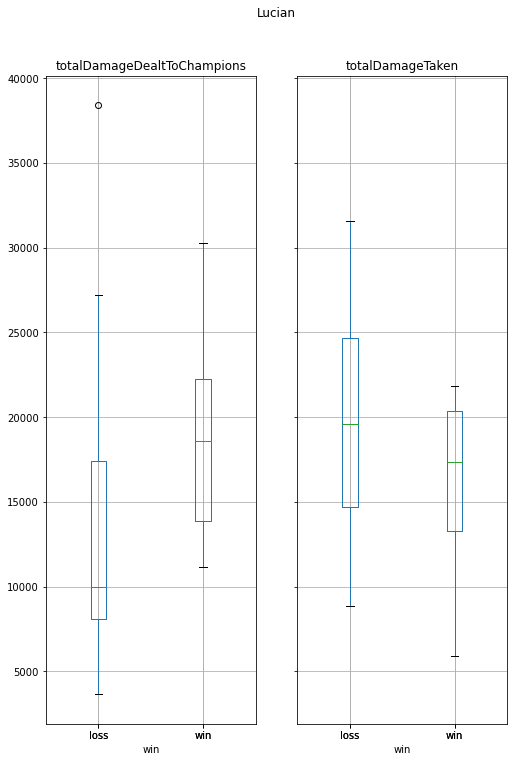

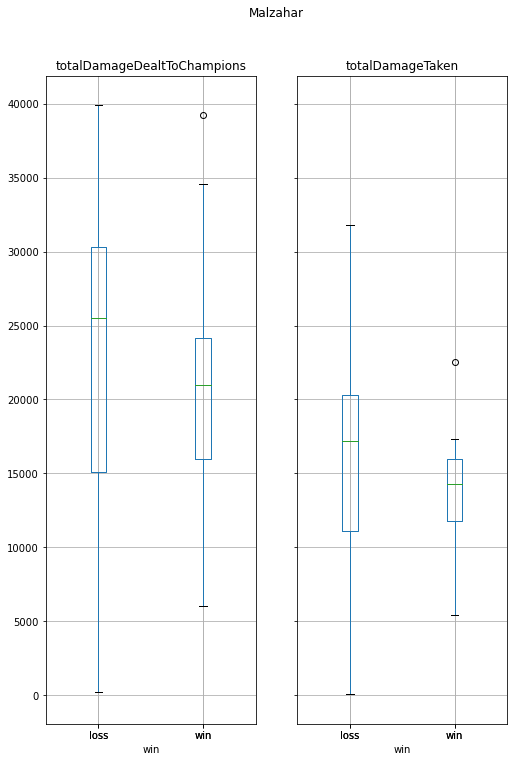

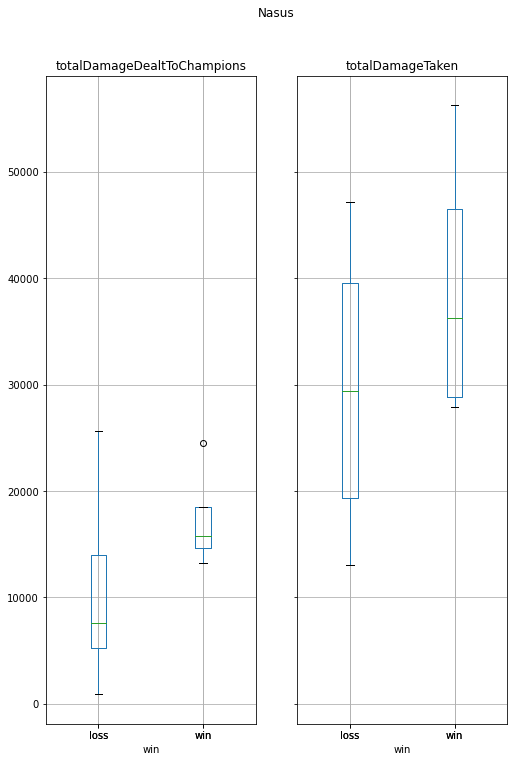

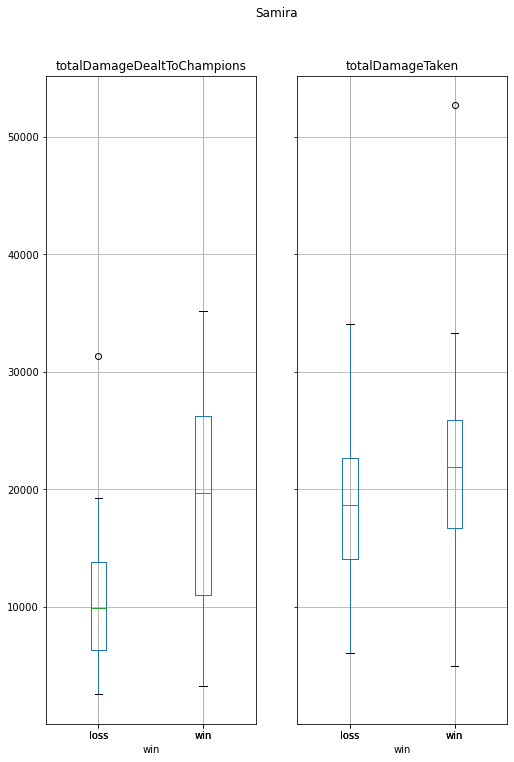

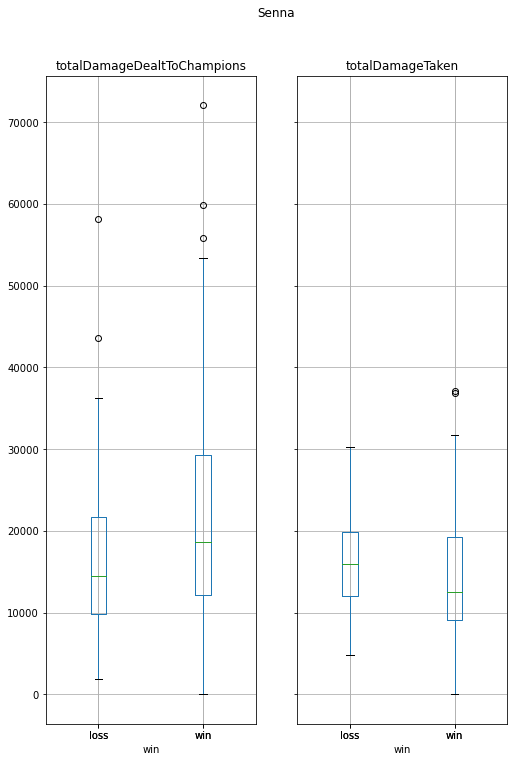

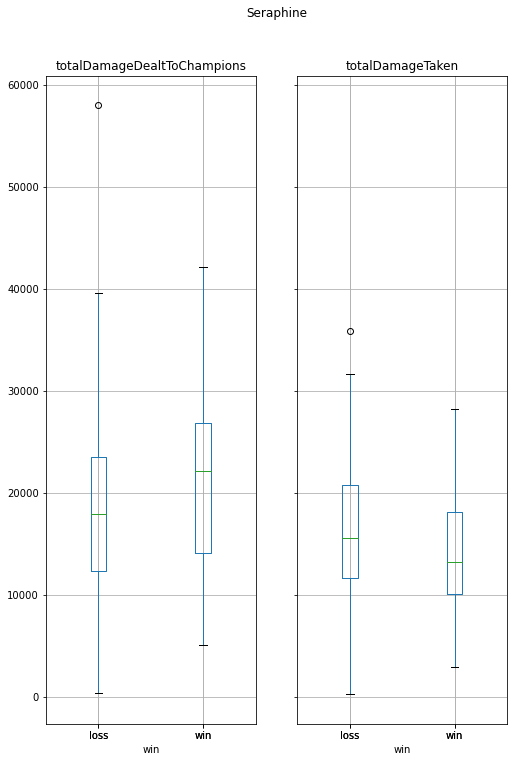

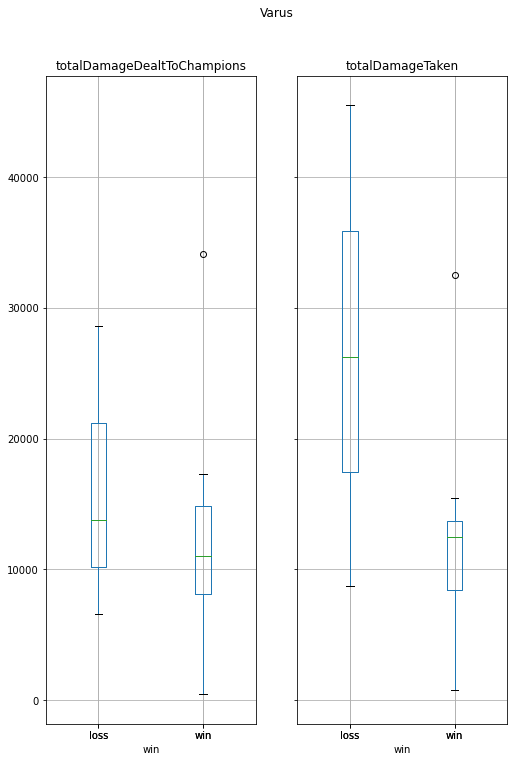

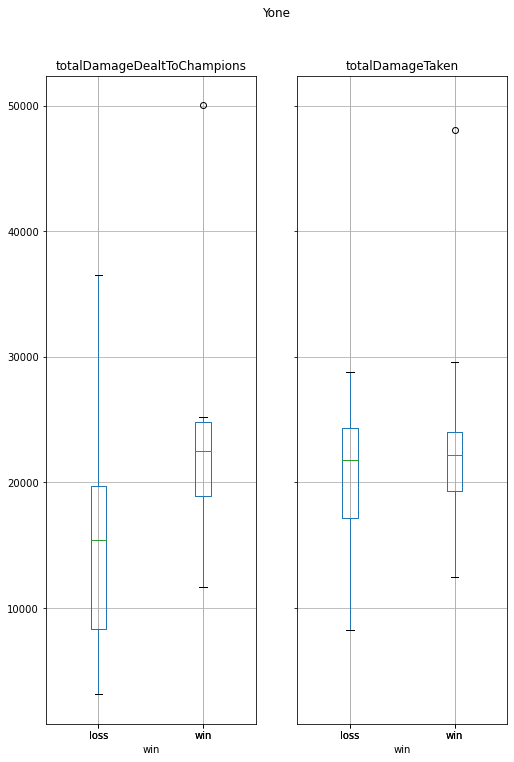

In [53]:
# this is just a boxplot of the win loss ratio measuring total damage.  I think that this can be usefull in a platform for analytics 
#  this would be very helpful for players that are trying to gain more knowlege about their play style specified by champ
# I used total damage and deaths as examples but I believe a chart like this matched on metrics that relate could be useful
# to players
# exp when i play lucian my damge ratio fall in line with wins and losses, high damage with wins lower with losses
# but I can see with malzahar I have a High overall damage output.

for namechamp in highestWinRate2['championName']:
    
    NEXTdf[NEXTdf['championName']==namechamp].boxplot(['totalDamageDealtToChampions','totalDamageTaken'], by='win', figsize=(8,12))
    plt.suptitle(namechamp)
    
;


''

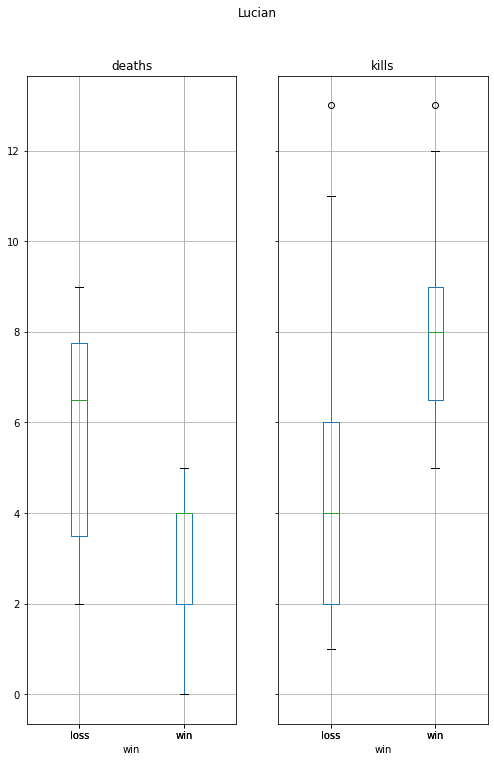

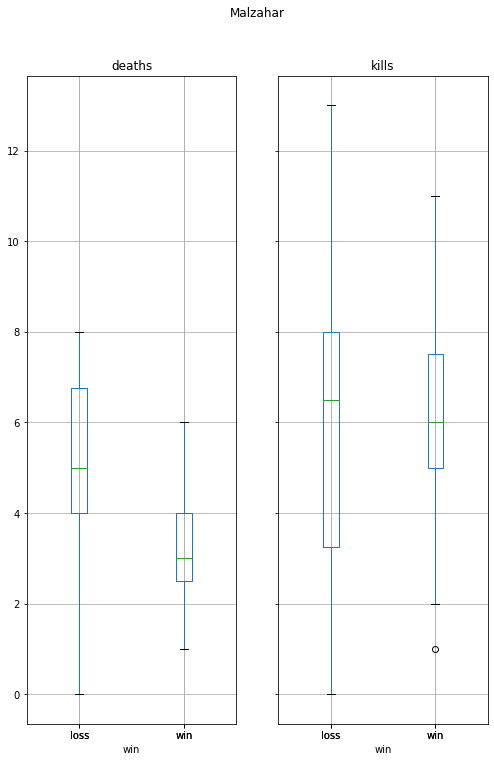

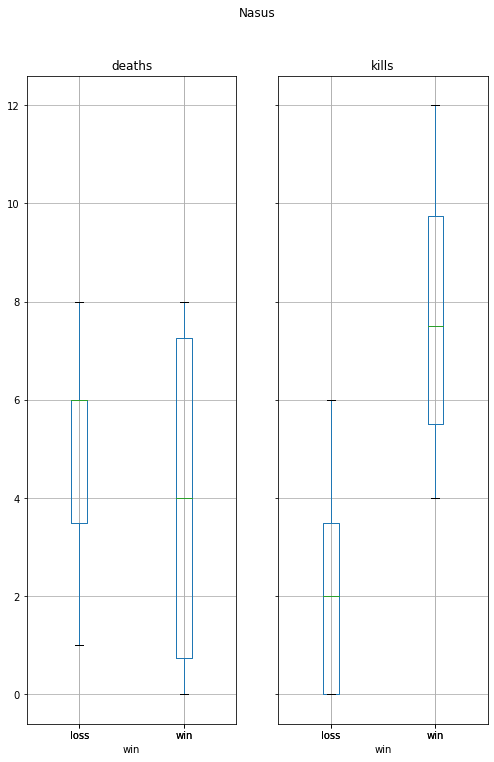

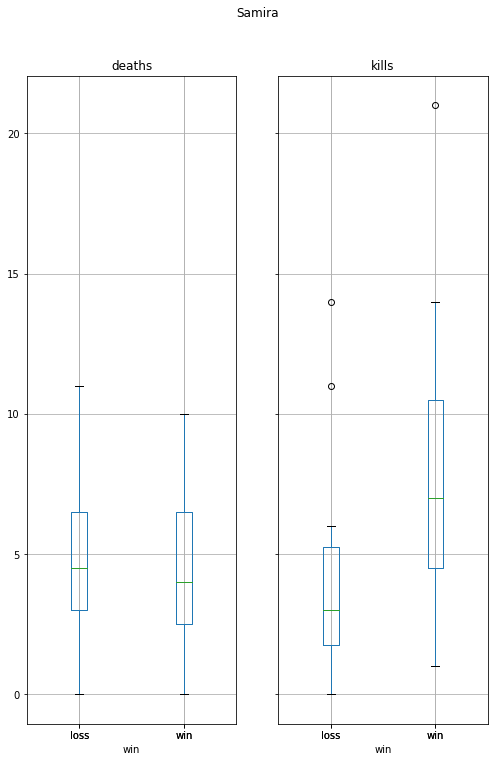

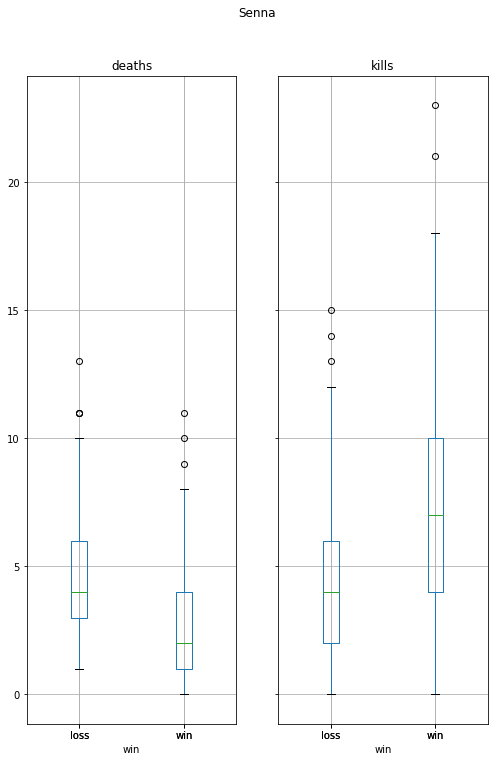

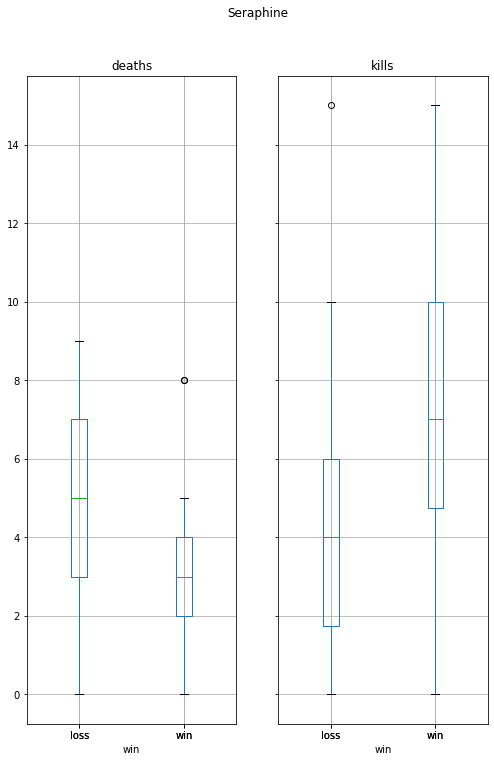

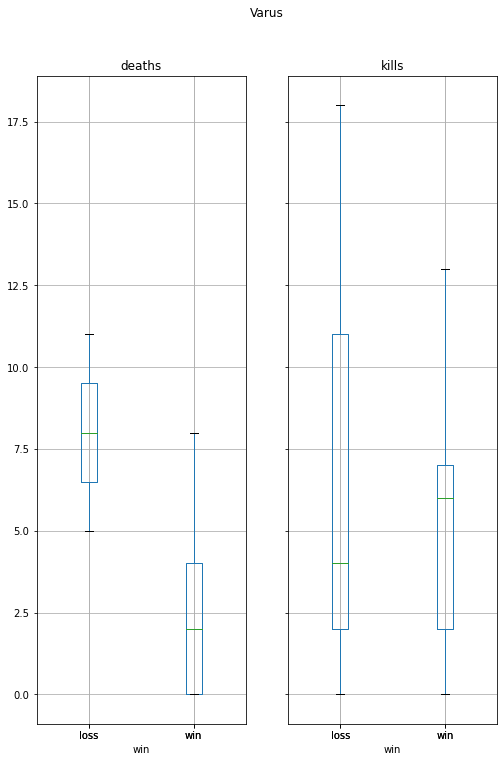

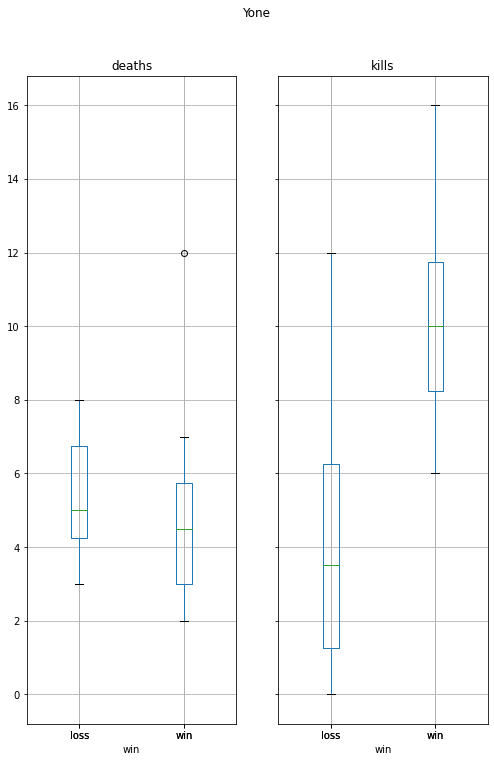

In [54]:
# same as above but with death and kill ratio 

for namechamp in highestWinRate2['championName']:
    
    NEXTdf[NEXTdf['championName']==namechamp].boxplot(['deaths','kills'], by='win', figsize=(8,12))
    plt.suptitle(namechamp)
    
;

(20.0, 45.0)

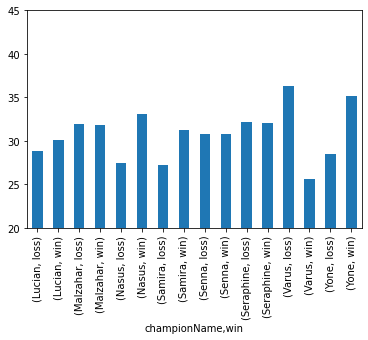

In [60]:
####  I also believe that a time analysis per champion is not really available.. certain champions scale as time goes on and have
##peak performance for some champs are in the begining or end and they can change on how the characters are built
# I would think a balanced champion would match seraphine or senna who both have equal mean game times

NEXTdf.groupby(['championName','win']).mean()['timePlayed'].plot(kind='bar')
plt.ylim([20,45])

array([<AxesSubplot:title={'center':'item2'}, xlabel='item0'>],
      dtype=object)

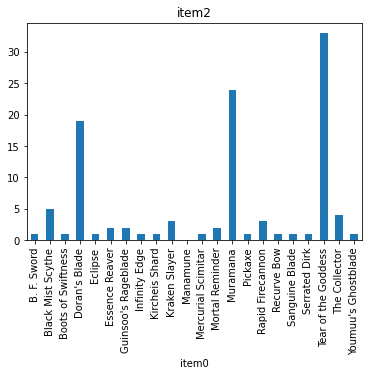

In [127]:
#these next two charts are of item builds also built around
#these are items  at the time of win or lose so naturally there will be a higher skew to early game items 
#but we can see that 

groupedloss=NEXTdf.groupby(['championName','win','item0'])['item2'].count()
groupedloss['Senna']['loss'].plot.bar(stacked=True,subplots=True)



array([<AxesSubplot:title={'center':'item2'}, xlabel='item0'>],
      dtype=object)

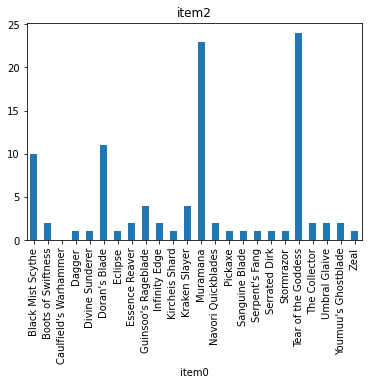

In [130]:

groupedwin=NEXTdf.groupby(['championName','win','item0'])['item2'].count()
groupedwin['Senna']['win'].plot.bar(stacked=True,subplots=True)

In [120]:
NEXTdf.groupby(['championName','win','item0'])['item2'].count()


championName  win   item0              
Lucian        loss  B. F. Sword            1
                    Berserker's Greaves    2
                    Doran's Blade          4
                    Galeforce              3
                    Immortal Shieldbow     2
                                          ..
Yone          win   Mortal Reminder        2
                    Phantom Dancer         1
                    Spirit Visage          1
                    Wit's End              1
                    Youmuu's Ghostblade    1
Name: item2, Length: 129, dtype: int64

In [23]:
NEXTdf.corr()

,assists,baronKills,bountyLevel,champExperience,champLevel,championId,championTransform,consumablesPurchased,damageDealtToObjectives,damageDealtToTurrets,...,turretKills,unrealKills,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,damageDealtToBuildings,inhibitorsLost,nexusLost,turretsLost
assists,1.000000,0.235929,0.184320,0.722632,0.632675,0.007419,NaN,0.285703,0.453456,0.349805,...,0.294398,NaN,0.431302,0.119744,0.236382,0.450244,0.408651,-0.044787,-0.220193,-0.040184
baronKills,0.235929,1.000000,0.128495,0.201384,0.197910,-0.054144,NaN,0.035981,0.387591,0.145997,...,0.164976,NaN,0.222760,0.133695,0.111279,0.204206,0.182985,-0.169446,-0.188443,-0.075843
bountyLevel,0.184320,0.128495,1.000000,0.157304,0.169452,0.029558,NaN,-0.012658,0.359597,0.363849,...,0.306348,NaN,0.012500,-0.076051,0.038484,0.009500,0.393959,-0.374144,-0.470222,-0.412195
champExperience,0.722632,0.201384,0.157304,1.000000,0.933255,-0.012881,NaN,0.297893,0.537783,0.399789,...,0.373064,NaN,0.459906,0.003067,0.254872,0.511924,0.436917,0.184634,0.003860,0.252858
champLevel,0.632675,0.197910,0.169452,0.933255,1.000000,-0.035362,NaN,0.248608,0.506190,0.391639,...,0.371440,NaN,0.464032,0.025634,0.240951,0.521877,0.414534,0.165900,0.061081,0.269718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wardsPlaced,0.450244,0.204206,0.009500,0.511924,0.521877,0.118584,NaN,0.406249,0.371912,0.237382,...,0.255650,NaN,0.953924,0.463132,0.496702,1.000000,0.280740,0.052809,-0.031227,0.190939
damageDealtToBuildings,0.408651,0.182985,0.393959,0.436917,0.414534,0.153629,NaN,0.180939,0.737213,1.000000,...,0.778896,NaN,0.301010,-0.019124,0.163630,0.280740,1.000000,-0.386545,-0.498998,-0.390839
inhibitorsLost,-0.044787,-0.169446,-0.374144,0.184634,0.165900,0.107024,NaN,0.127485,-0.334518,-0.386545,...,-0.340480,NaN,0.001693,0.012349,-0.038303,0.052809,-0.386545,1.000000,0.682376,0.821250
nexusLost,-0.220193,-0.188443,-0.470222,0.003860,0.061081,0.048807,NaN,-0.002719,-0.435489,-0.498998,...,-0.434985,NaN,-0.116361,-0.008844,-0.102802,-0.031227,-0.498998,0.682376,1.000000,0.803552


In [41]:
trimNEXTdf=NEXTdf.drop(['sightWardsBoughtInGame','nexusLost','turretsLost','inhibitorsLost', 'visionWardsBoughtInGame', 'wardsKilled', 'wardsPlaced', 'turretKills', 'unrealKills', 'tripleKills', 'totalDamageShieldedOnTeammates', 'teamId', 'teamPosition', 'spell1Casts', 'spell2Casts', 'spell3Casts', 'spell4Casts', 'summoner1Casts', 'summoner1Id', 'summoner2Casts', 'summoner2Id', 'summonerId', 'summonerLevel', 'summonerName', 'riotIdName', 'riotIdTagline', 'role', 'objectivesStolen', 'objectivesStolenAssists', 'participantId', 'pentaKills', 'physicalDamageDealt', 'physicalDamageDealtToChampions', 'physicalDamageTaken', 'profileIcon', 'puuid', 'neutralMinionsKilled', 'nexusKills', 'magicDamageDealt', 'magicDamageDealtToChampions', 'magicDamageTaken','item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'goldEarned', 'goldSpent', 'individualPosition', 'inhibitorKills', 'damageSelfMitigated', 'champLevel', 'championId', 'championName', 'championTransform', 'consumablesPurchased'], axis=1)

this this is a looking at correlation matrix   

In [42]:
trimNEXTdf["win"]=trimNEXTdf['win'].map(lambda x: 1 if x=='win' else 0)

trimNEXTdf.corr()

,assists,baronKills,bountyLevel,champExperience,damageDealtToObjectives,damageDealtToTurrets,deaths,detectorWardsPlaced,doubleKills,dragonKills,...,totalMinionsKilled,totalTimeCCDealt,totalTimeSpentDead,totalUnitsHealed,trueDamageDealt,trueDamageDealtToChampions,trueDamageTaken,visionScore,win,damageDealtToBuildings
assists,1.000000,0.235929,0.184320,0.722632,0.453456,0.349805,0.239422,0.135165,0.239568,0.117386,...,0.248034,0.372157,0.346704,0.362555,0.171304,0.401404,0.273356,0.431302,0.357366,0.408651
baronKills,0.235929,1.000000,0.128495,0.201384,0.387591,0.145997,0.003117,0.149135,0.204882,0.128467,...,0.023580,0.199903,0.066614,0.081567,0.065984,0.118504,0.218634,0.222760,0.201032,0.182985
bountyLevel,0.184320,0.128495,1.000000,0.157304,0.359597,0.363849,-0.366728,-0.060696,0.340029,0.213872,...,0.104257,0.037521,-0.298387,0.120250,0.058376,0.159902,-0.032999,0.012500,0.538958,0.393959
champExperience,0.722632,0.201384,0.157304,1.000000,0.537783,0.399789,0.368830,0.010442,0.426685,0.194296,...,0.693711,0.405773,0.551113,0.227766,0.376305,0.546513,0.425708,0.459906,0.198270,0.436917
damageDealtToObjectives,0.453456,0.387591,0.359597,0.537783,1.000000,0.696531,0.013110,0.019556,0.468933,0.374119,...,0.371728,0.173601,0.183270,0.059504,0.313692,0.403214,0.241651,0.354856,0.531655,0.737213
damageDealtToTurrets,0.349805,0.145997,0.363849,0.399789,0.696531,1.000000,-0.111704,0.015898,0.384218,0.148200,...,0.325525,0.017732,0.030201,0.094943,0.151750,0.264082,0.066270,0.234861,0.618839,1.000000
deaths,0.239422,0.003117,-0.366728,0.368830,0.013110,-0.111704,1.000000,0.106814,0.113109,0.060493,...,0.113498,0.203622,0.904988,-0.048167,0.159568,0.229450,0.460214,0.287775,-0.360592,-0.073345
detectorWardsPlaced,0.135165,0.149135,-0.060696,0.010442,0.019556,0.015898,0.106814,1.000000,0.071221,0.018932,...,-0.245172,0.067150,0.064277,0.103485,-0.150787,-0.036923,0.031850,0.564762,0.047856,0.000734
doubleKills,0.239568,0.204882,0.340029,0.426685,0.468933,0.384218,0.113109,0.071221,1.000000,0.211959,...,0.332508,0.194921,0.245913,-0.008839,0.132227,0.338719,0.232048,0.237763,0.277069,0.447412
dragonKills,0.117386,0.128467,0.213872,0.194296,0.374119,0.148200,0.060493,0.018932,0.211959,1.000000,...,0.089527,0.165418,0.117381,-0.057732,0.133595,0.123525,0.162142,0.146685,0.158627,0.138244


In [57]:
NEXTdf['timePlayed']=NEXTdf['timePlayed'].map(lambda x: x/60 )

<ipython-input-57-35518581c9a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NEXTdf['timePlayed']=NEXTdf['timePlayed'].map(lambda x: x/60 )
